In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("https://github.com/Rodrigojaure92/30daychartchallenge/raw/refs/heads/main/Day15-Historical/stock_historical_retail.xlsx")

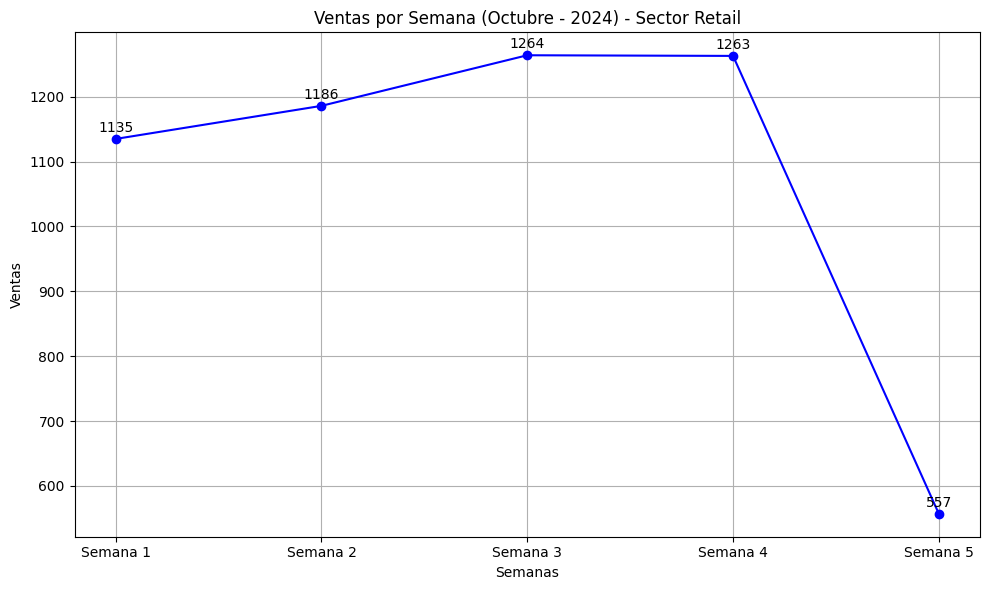

In [26]:
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Semana'] = data['Fecha'].dt.isocalendar().week - data['Fecha'].dt.isocalendar().week.min() + 1

# Agrupar los datos por semana y calcular la suma de las ventas para cada semana
ventas_por_semana = data.groupby('Semana')['Ventas'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(ventas_por_semana['Semana'], ventas_por_semana['Ventas'], marker='o', linestyle='-', color='b')

# Añadir valores sobre los puntos
for i, row in ventas_por_semana.iterrows():
    plt.annotate(f"{row['Ventas']}", (row['Semana'], row['Ventas']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.title('Ventas por Semana (Octubre - 2024) - Sector Retail')
plt.xlabel('Semanas')
plt.ylabel('Ventas')
plt.xticks(ventas_por_semana['Semana'], labels=[f'Semana {i}' for i in ventas_por_semana['Semana']])
plt.grid(True)
plt.tight_layout()
plt.show()